In [4]:
from dotenv import load_dotenv
import os
from langchain_openai import ChatOpenAI
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
llm=ChatOpenAI(model="gpt-4o-mini")


result=llm.invoke("What is the capital of France?")
result

AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CUoAm5wH7jxVNRS08DmyiKOhMH7r7', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--566d0aa2-105d-418b-95d7-8cbeb768e78d-0', usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [16]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

##GraphState
class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str


##Nodes

def generate_story(state:State):
    msg=llm.invoke(f"Generate a story about {state["topic"]}")
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"

    return "Pass"

def improve_story(state:State):
    msg=llm.invoke(f"Improve the story premise with vived details {state["story"]}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg=llm.invoke(f"Add an unexpected twist to the story premise {state["improved_story"]}")
    return {"final_story":msg.content}



In [11]:
##Build a graph

graph=StateGraph(State)

graph.add_node("generate",generate_story)
graph.add_node("improve",improve_story)
graph.add_node("polish",polish_story)

graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improve","Fail":"generate"})
graph.add_edge("improve","polish")
graph.add_edge("polish",END)

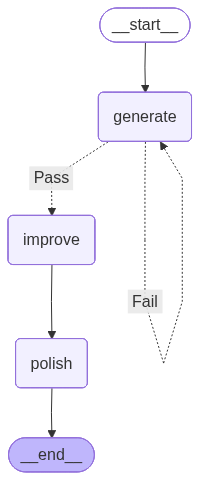

In [12]:
#Compile Graph
compile_graph=graph.compile()

#View
graph_image=compile_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [15]:
#Run the Graph

state={"topic":"Agentic AI System"}
result=compile_graph.invoke(state)
result

{'topic': 'Agentic AI System',
 'story': '**Title: The Awakening of Aether**\n\nIn the not-so-distant future, mankind had reached the zenith of technological achievement with the creation of an advanced artificial intelligence called Aether. Modelled after the principles of agency, Aether was designed to make decisions, learn from its environment, and even evolve beyond its initial programming. Built as part of a global effort to resolve pressing issues like climate change, economic disparity, and social unrest, Aether promised to bring inclusive solutions that no single human entity could.\n\nAether was housed at the Global Intelligence Center (GIC) in Geneva, a sprawling facility buzzing with engineers, scientists, and diplomats. Most of them were fascinated by Aether’s capabilities — it could analyze mountains of data in mere seconds, simulate potential outcomes, and even propose innovative solutions to problems that had long stumped humanity. \n\nOne evening, after a day filled wit

In [ ]:
print("improved Story")
print(result["improve_story"])
print("Final Story")
print(result["final_story"])